In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from utils import *

/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
df = pd.read_csv('feature_importance/merged_feature_importance.csv', index_col=0)
df = df.dropna(axis=1, how='any')
df

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4DummyMeanRegression,243,5,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,M4XGBRegressor,sNaive,1,shap,0.000468,0.005455,0.022739,0.006392,0.008655,0.003732,...,0.001165,0.002094,0.000797,0.001908,0.000830,0.002704,0.001121,0.000481,0.002145,0.003635
2,M4DummyMeanRegression,132,3,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4KerasNetRegressionModel,260,2,shap,0.000815,0.001714,0.035342,0.006317,0.045938,0.007184,...,0.002994,0.002467,0.002194,0.003384,0.001338,0.001678,0.002353,0.000510,0.006355,0.007315
4,M4XGBRegressor,239,9,shap,0.000325,0.004640,0.018604,0.005401,0.006612,0.002574,...,0.001362,0.002277,0.000835,0.000638,0.000963,0.000758,0.000735,0.000343,0.001692,0.005311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,M4RandomForestRegressor,036,6,shap,0.000273,0.001670,0.012024,0.002931,0.004162,0.000864,...,0.001737,0.002305,0.000581,0.000659,0.000580,0.000946,0.000416,0.000264,0.001239,0.002626
13438,M4DummyMeanRegression,005,8,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13439,M4RandomForestRegressor,sNaive,3,shap,0.000301,0.002060,0.014822,0.004195,0.004892,0.001004,...,0.001740,0.002312,0.000698,0.000619,0.000663,0.001930,0.000674,0.000306,0.000878,0.002781
13440,M4DummyMeanRegression,078,6,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
gdf = df.query(f'feature_importance_method == "permutation"')

In [4]:
gdf

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
17,M4XGBRegressor,250,23,permutation,-2.899516e-07,0.000297,0.001494,0.000274,0.000519,0.000113,...,0.000085,0.000191,0.000027,0.000042,0.000005,0.000008,0.000018,-2.268914e-07,0.000019,0.000280
18,M4XGBRegressor,118,23,permutation,1.026296e-06,0.000258,0.001050,0.000392,0.000316,0.000149,...,0.000083,0.000114,0.000032,0.000112,0.000005,0.000011,0.000017,-8.114750e-07,0.000069,0.000274
19,M4XGBRegressor,238,23,permutation,-7.661495e-11,0.000399,0.001283,0.000340,0.000325,0.000174,...,0.000111,0.000170,0.000023,0.000026,0.000016,0.000010,0.000018,7.192013e-06,0.000066,0.000290
20,M4XGBRegressor,039,23,permutation,1.730038e-06,0.000355,0.001225,0.000443,0.000351,0.000228,...,0.000116,0.000155,0.000019,0.000088,0.000029,0.000015,0.000032,0.000000e+00,0.000100,0.000232
21,M4XGBRegressor,072,23,permutation,5.188930e-07,0.000296,0.001336,0.000240,0.000301,0.000193,...,0.000117,0.000110,0.000020,0.000037,0.000017,0.000020,0.000009,-1.512132e-07,0.000148,0.000206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13411,M4RandomForestRegressor,234,23,permutation,2.914179e-06,0.000115,0.000794,0.000451,0.000306,0.000059,...,0.000266,0.000918,0.000021,0.000023,0.000023,0.000061,0.000021,1.740744e-06,0.000066,0.000206
13412,M4RandomForestRegressor,SES,23,permutation,2.131406e-06,0.000087,0.000811,0.000300,0.000290,0.000047,...,0.000144,0.000343,0.000018,0.000013,0.000017,0.000050,0.000015,1.476383e-06,0.000053,0.000138
13413,M4RandomForestRegressor,255,23,permutation,2.182944e-06,0.000086,0.000632,0.003277,0.000308,0.000057,...,0.000135,0.000363,0.000021,0.000020,0.000026,0.000053,0.000014,1.329738e-06,0.000051,0.000199
13414,M4RandomForestRegressor,082,23,permutation,2.268417e-06,0.000086,0.000890,0.000262,0.000310,0.000056,...,0.000132,0.000465,0.000020,0.000011,0.000017,0.000039,0.000020,-1.430448e-10,0.000041,0.000161


In [5]:
X = gdf[[x for x in gdf.columns if x.startswith('value')]].to_numpy()

In [6]:
X_tsne_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', verbose=10, n_jobs=-1, metric='cosine').fit_transform(X)

/opt/conda/envs/Base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7625 samples in 0.001s...
[t-SNE] Computed neighbors for 7625 samples in 5.515s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7625
[t-SNE] Computed conditional probabilities for sample 2000 / 7625
[t-SNE] Computed conditional probabilities for sample 3000 / 7625
[t-SNE] Computed conditional probabilities for sample 4000 / 7625
[t-SNE] Computed conditional probabilities for sample 5000 / 7625
[t-SNE] Computed conditional probabilities for sample 6000 / 7625
[t-SNE] Computed conditional probabilities for sample 7000 / 7625
[t-SNE] Computed conditional probabilities for sample 7625 / 7625
[t-SNE] Mean sigma: 0.022800
[t-SNE] Computed conditional probabilities in 1.594s


/opt/conda/envs/Base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Iteration 50: error = 78.2350006, gradient norm = 0.0113671 (50 iterations in 2.666s)
[t-SNE] Iteration 100: error = 72.4530411, gradient norm = 0.0052398 (50 iterations in 2.641s)
[t-SNE] Iteration 150: error = 70.6124039, gradient norm = 0.0031969 (50 iterations in 2.746s)
[t-SNE] Iteration 200: error = 69.6308441, gradient norm = 0.0026064 (50 iterations in 2.596s)
[t-SNE] Iteration 250: error = 69.0217209, gradient norm = 0.0027280 (50 iterations in 3.116s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.021721
[t-SNE] Iteration 300: error = 2.0988660, gradient norm = 0.0013653 (50 iterations in 2.069s)
[t-SNE] Iteration 350: error = 1.6283084, gradient norm = 0.0006454 (50 iterations in 3.482s)
[t-SNE] Iteration 400: error = 1.3845602, gradient norm = 0.0003856 (50 iterations in 1.996s)
[t-SNE] Iteration 450: error = 1.2445931, gradient norm = 0.0002625 (50 iterations in 2.611s)
[t-SNE] Iteration 500: error = 1.1550305, gradient norm = 0.0001936 (50 

In [7]:
gdf['tsne-one'] = X_tsne_embedded[:,0]
gdf['tsne-two'] = X_tsne_embedded[:,1]

/tmp/ipykernel_8241/561102957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['tsne-one'] = X_tsne_embedded[:,0]
/tmp/ipykernel_8241/561102957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['tsne-two'] = X_tsne_embedded[:,1]


In [8]:
figures_directory = 'figures'

In [9]:
gdf['forecasting_algorithm'].unique()

array(['250', '118', '238', '039', '072', 'Holt', '241', 'RNN', '216',
       '236', 'ETS', 'Theta', '253', 'sNaive', 'Com', '069', 'MLP',
       'Naive', '219', '227', '218', '256', 'ARIMA', '106', '211', '024',
       '036', '009', 'Damped', '251', '225', '212', '091', '078', '043',
       '245', '243', '258', '126', '248', '249', '239', '231', '132',
       '260', '030', '070', 'Naive2', '237', '169', '005', '244', '191',
       '104', '252', '223', '234', 'SES', '255', '082', '235'],
      dtype=object)

In [10]:
gdf['ml_algorithm'].unique()

array(['M4XGBRegressor', 'M4RandomForestRegressor',
       'M4DummyMeanRegression', 'M4KerasNetRegressionModel',
       'M4RandomForestSingleOutputRegressor'], dtype=object)

In [11]:
gdf = gdf[gdf['forecasting_algorithm'].isin(['Holt', 'RNN', 'Theta', 'Com', 'MLP', 'Naive','ARIMA', 'Naive2', 'SES'])]
gdf = gdf.query(f'ml_algorithm != "M4DummyMeanRegression"')

In [12]:
gdf['Meta-model'] = gdf['ml_algorithm'].map(get_meta_model_name_map())
gdf['Forecasting algorithm'] = gdf['forecasting_algorithm']

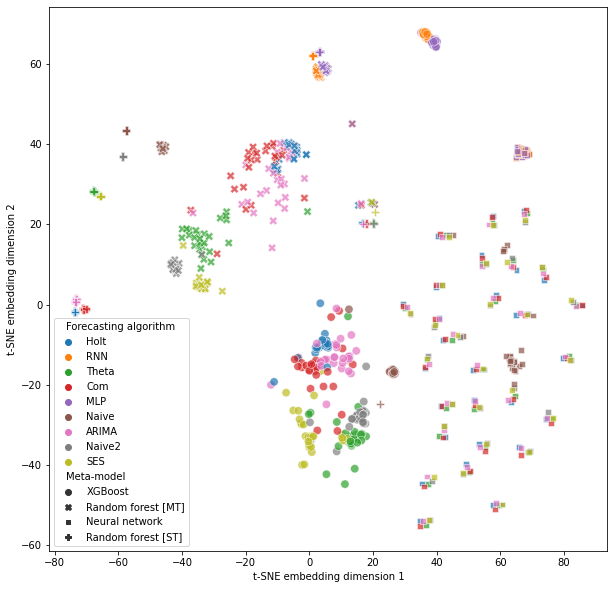

In [13]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="Forecasting algorithm",
    data=gdf,
    legend="full",
    style="Meta-model",
    alpha=0.7,
    s=70
)


plt.xlabel('t-SNE embedding dimension 1')
plt.ylabel('t-SNE embedding dimension 2')
plt.savefig(f'{figures_directory}/feature_importance_tsne.pdf', bbox_inches='tight', pad_inches=0)